In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv 
import math

In [2]:
#Z=1
# GREEN_PATH = "Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Green Channel/Channel Image Stack/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-Z=1.jpg"
# RED_PATH = "Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Red Channel/Channel Image Stack/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-Z=1.jpg"

#Z=2
GREEN_PATH = "Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Green Channel/Channel Image Stack/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-Z=2.jpg"
RED_PATH = "Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Red Channel/Channel Image Stack/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-Z=2.jpg"

# Z=3
# GREEN_PATH = "Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Green Channel/Channel Image Stack/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-Z=3.jpg"
# RED_PATH = "Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Red Channel/Channel Image Stack/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-Z=3.jpg"


green_image = cv.imread(GREEN_PATH)
red_image = cv.imread(RED_PATH)
green_channel = pd.read_csv("Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Green Channel/Statistics for Median of A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-1.csv")
red_channel = pd.read_csv("Extracted spots detection by FIJI/A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)/Red Channel/Statistics for Median of A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 - A5_M_H3K27ac_488_Rab_H3K4me1_546_001.nd2 (series 1)-1.csv")

In [6]:
from vectorPreProcess import vectorsPreProcces as vpp
from MandersC import MandersC as mc
from PearsonsC import PearsonC as pc

z_levels_list = [1,2,3,4]

mc = mc(is_objects=True, z_levels=z_levels_list, intensity_feature_name="IntDen")
pc = pc(is_objects=True, z_levels=z_levels_list, intensity_feature_name="IntDen")
vpp = vpp()
v1, v2 = vpp.same_length_vectors(green_channel.loc[:, ['X', 'Y', 'Z', 'IntDen']], red_channel.loc[:, ['X','Y','Z', 'IntDen']])
# mc.calc_MOC_for_single_file(v1,v2)
pc.calc_pearson(v1, v2, True)

KeyboardInterrupt: 

In [ ]:
center_spot = green_channel.iloc[4-1:4]
spot_x = center_spot['X'].data.obj[0]
spot_y = center_spot['Y'].data.obj[0]

In [ ]:
math.degrees(math.acos(0))

# type(list(red_channel.index))

In [31]:
center_spot = (400, 200)
radius = 100
distances_between_center_and_all_typeB = np.sqrt(np.power(center_spot[0] - red_channel["X"], 2, dtype="float") + np.power(center_spot[1] - red_channel["Y"], 2, dtype="float"))
green_channel.loc[pd.DataFrame(list(red_channel.index)).isin(distances_between_center_and_all_typeB[distances_between_center_and_all_typeB<radius]._index[1])] 
# green_channel[green_channel['Z']==1].head()

TypeError: only list-like or dict-like objects are allowed to be passed to DataFrame.isin(), you passed a 'int64'

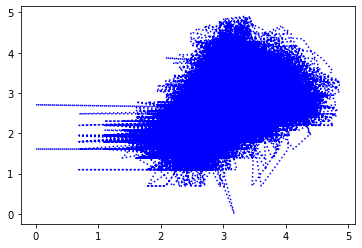

In [7]:
from SimpleDistributions import SimpleDistributions as sd
sd = sd()

sd.plot_pixel_intensities(green_image, red_image, True, True)
# green_pixels_intensities_ranked = convert_to_rank(green_image[:,:,1].flatten())
# red_pixels_intensities_ranked = convert_to_rank(red_image[:,:,2].flatten())
# 
# green_pixels_intensities = green_image[:,:,1].flatten()
# red_pixels_intensities = red_image[:,:,2].flatten()
# 
# #with logs
# # plt.plot(np.log(green_pixels_intensities), np.log(red_pixels_intensities),linestyle=":",color="red")
# # plt.plot(np.log(green_pixels_intensities_ranked), np.log(red_pixels_intensities_ranked), linestyle=":",color="blue")
# #without logs
# plt.plot(green_pixels_intensities, red_pixels_intensities,linestyle=":",color="red")
# plt.plot(green_pixels_intensities_ranked, red_pixels_intensities_ranked, linestyle=":",color="blue")
# 
# plt.ylabel = "red"
# plt.xlabel = "green"

In [7]:
# CALCULATING PEARSON'S COEFFIECIENT


def calc_pearson(im1, im2, channels_to_consider:tuple =(1,2), **kwargs):
    if kwargs.get('already_flatten'):
        already_flatten = kwargs.get('already_flatten')
    else:
        already_flatten = False
    if not already_flatten:
        im1_pixels_intensities = im1[:,:,channels_to_consider[0]].flatten()
        im2_pixels_intensities = im2[:,:,channels_to_consider[1]].flatten()
    else:
        im1_pixels_intensities = im1.copy() 
        im2_pixels_intensities = im2.copy()
    
    total_average_im1_pixels =  np.average(im1_pixels_intensities)
    total_average_im2_pixels =  np.average(im2_pixels_intensities)
    
    im1_pixels_intensities_average_subtracted = im1_pixels_intensities - total_average_im1_pixels
    im2_pixels_intensities_average_subtracted = im2_pixels_intensities - total_average_im2_pixels
    
    nom = np.sum(im1_pixels_intensities_average_subtracted* im2_pixels_intensities_average_subtracted)
    denom = np.sqrt(np.sum(np.power(im1_pixels_intensities_average_subtracted, 2, dtype="float"), dtype="float")) * np.sqrt(np.sum(np.power(im2_pixels_intensities_average_subtracted, 2, dtype="float"), dtype="float"))
    return nom/denom

def calc_spearman_rank_correlation_SRCC(im1, im2, channels_to_consider=(1,2)):
    
    def convert_to_rank(vector):
        from scipy.stats import rankdata
        return rankdata(vector, method="dense")
    
    im1_pixels_intensities = im1[:,:,channels_to_consider[0]].flatten()
    im2_pixels_intensities = im2[:,:,channels_to_consider[1]].flatten()
    
    return calc_pearson(convert_to_rank(im1_pixels_intensities), convert_to_rank(im2_pixels_intensities), channels_to_consider=channels_to_consider, already_flatten=True)
    
print(calc_spearman_rank_correlation_SRCC(green_image, red_image))

KeyboardInterrupt: 